In [2]:
!git clone https://github.com/fastai/fastai && pip3 install -e "fastai/.[dev]"

fatal: destination path 'fastai' already exists and is not an empty directory.


In [3]:
!pip3 install torch torchvision

In [0]:
import torch

In [0]:
import torchvision

In [0]:
import fastai

In [0]:
# This file contains all the main external libs we'll use
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
!pip3 install torchvision fastai==0.6

In [0]:
# This file contains all the main external libs we'll use
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [8]:
torch.cuda.is_available()

True

In [9]:
torch.backends.cudnn.enabled

True

In [0]:
!cd fastai/data/ && wget http://files.fast.ai/data/dogscats.zip

In [0]:
os.makedirs('data/dogscats/models', exist_ok=True)

!ln -s /datasets/fast.ai/dogscats/train {PATH}
!ln -s /datasets/fast.ai/dogscats/test {PATH}
!ln -s /datasets/fast.ai/dogscats/valid {PATH}

os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

In [0]:
!cd fastai/data/ && unzip dogscats.zip

In [0]:
!ls fastai/data/

adult_sample.tgz  dogscats  dogscats.zip  human_numbers.tgz  test


In [0]:
PATH = "fastai/data/dogscats/"
sz=224

In [11]:
os.listdir(PATH)
os.listdir(f'{PATH}valid')


['dogs', 'cats']

In [0]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.7657.jpg',
 'cat.11272.jpg',
 'cat.11681.jpg',
 'cat.5641.jpg',
 'cat.4160.jpg']

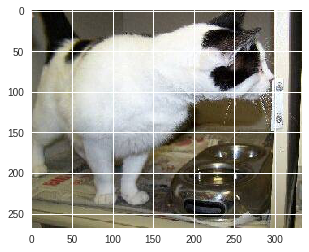

In [0]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [0]:
img.shape

(268, 334, 3)

In [0]:
img[:4, :4]

array([[[101,  75,  60],
        [ 81,  62,  47],
        [ 66,  52,  39],
        [ 63,  59,  47]],

       [[116,  90,  73],
        [ 96,  74,  60],
        [ 78,  64,  51],
        [ 73,  67,  55]],

       [[127, 101,  84],
        [106,  85,  68],
        [ 85,  72,  56],
        [ 77,  71,  57]],

       [[131, 104,  85],
        [110,  87,  69],
        [ 87,  71,  55],
        [ 75,  68,  52]]], dtype=uint8)

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01,2)

In [43]:
# this gives prediction for validation set. Predictions are in log scale
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
# This is the label for a val data
data.val_y
data.classes
log_preds = learn.predict()
log_preds.shape



(2000, 2)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


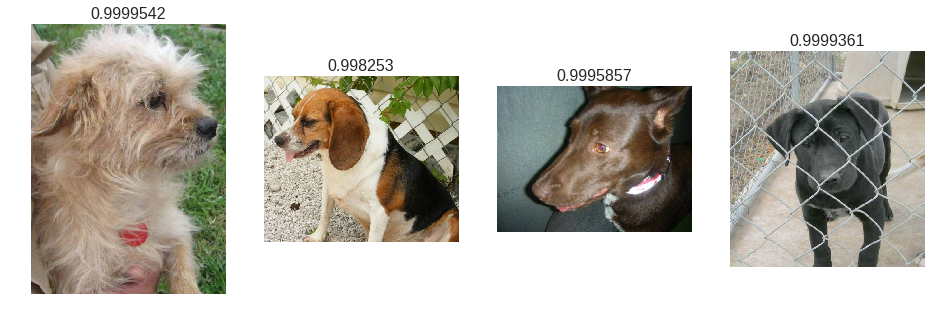

In [45]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


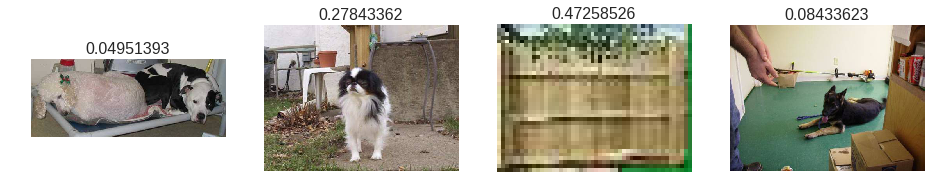

In [46]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")